In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly
import plotly.graph_objs as go

In [3]:
from sklearn.metrics import r2_score,mean_absolute_error,median_absolute_error,mean_squared_error,mean_squared_log_error

In [4]:
from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from tqdm import tqdm_notebook
from itertools import product
def mean_absolute_percentage_error(y_true,y_pred):
    return np.mean(np.abs(((y_true-y_pred)/y_true)))*100
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
df=pd.read_csv('C:/Users/Acer/OneDrive/Desktop/FINAL YEAR/FINAL YEARR/Final Dataset.csv')

In [6]:
df.head()

Datetime       BESCOM
0  01-01-2018 00:00  211786.8638
1  01-01-2018 01:00  204022.4531
2  01-01-2018 02:00  198376.1782
3  01-01-2018 03:00  198870.6240
4  01-01-2018 04:00  201310.4045

In [8]:
df

Datetime       BESCOM
0      01-01-2018 00:00  211786.8638
1      01-01-2018 01:00  204022.4531
2      01-01-2018 02:00  198376.1782
3      01-01-2018 03:00  198870.6240
4      01-01-2018 04:00  201310.4045
...                 ...          ...
17515  12/31/2019 19:00  248972.7234
17516  12/31/2019 20:00  232655.9861
17517  12/31/2019 21:00  226721.6016
17518  12/31/2019 22:00  232988.5247
17519  12/31/2019 23:00  220895.3911

[17520 rows x 2 columns]

In [9]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [10]:
df['Datetime']=pd.to_datetime(df['Datetime'],format=('%Y-%m-%d'))

In [11]:
df.head()


Datetime       BESCOM
0 2018-01-01 00:00:00  211786.8638
1 2018-01-01 01:00:00  204022.4531
2 2018-01-01 02:00:00  198376.1782
3 2018-01-01 03:00:00  198870.6240
4 2018-01-01 04:00:00  201310.4045

In [12]:
df['Hours_of_day']=df['Datetime'].dt.hour

In [13]:
df['Year']=df['Datetime'].dt.year

In [14]:
df['Daily']=df['Datetime'].dt.day

In [15]:
df['Month']=df['Datetime'].dt.month

In [16]:
df.groupby(['Year','Daily','Month']).agg({'BESCOM':'sum'}).reset_index()

Year  Daily  Month        BESCOM
0    2018      1      1  5.465430e+06
1    2018      1      2  6.269668e+06
2    2018      1      3  6.447422e+06
3    2018      1      4  5.690753e+06
4    2018      1      5  5.758420e+06
..    ...    ...    ...           ...
725  2019     31      5  5.939202e+06
726  2019     31      7  5.727088e+06
727  2019     31      8  5.505715e+06
728  2019     31     10  4.557282e+06
729  2019     31     12  6.058901e+06

[730 rows x 4 columns]

In [17]:
df['Week']=df['Datetime'].dt.week

In [18]:
df['Quarter']=df['Datetime'].dt.quarter

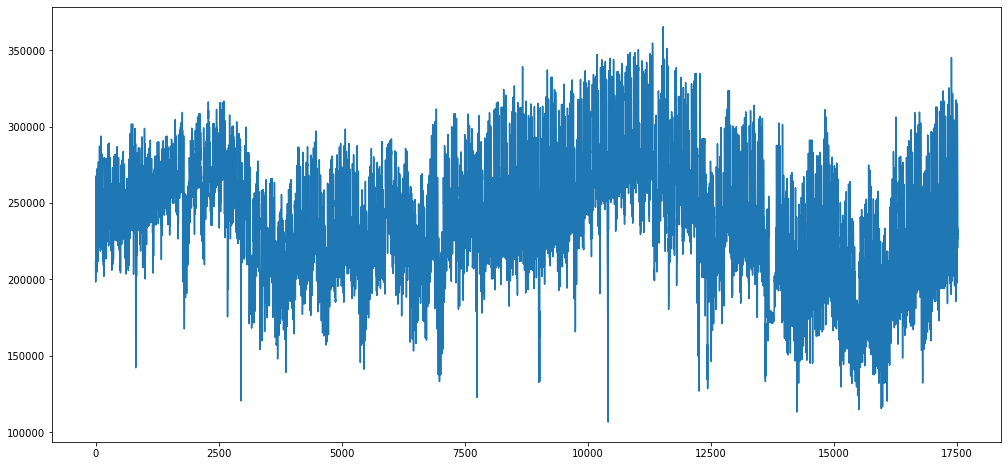

In [19]:
plt.figure(figsize=(17,8))
plt.plot(df.BESCOM)
plt.show()

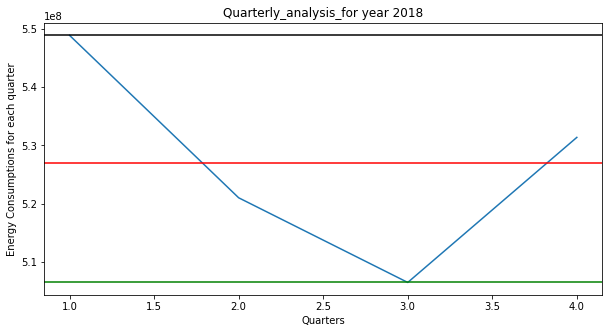

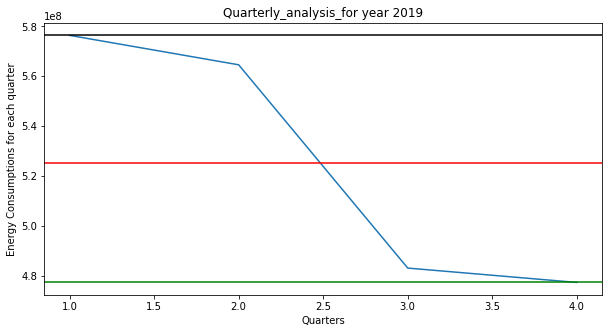

In [20]:
#QUARTERLY ANALYSIS 
for i in df['Year'].unique():
    x=df[df['Year']==i]
    x=x.groupby(['Quarter']).agg({'BESCOM':'sum'})
    plt.figure(figsize=(10,5))
    plt.plot(x.BESCOM)
    plt.axhline(y=np.mean(x.BESCOM),color='red')
    plt.axhline(y=np.min(x.BESCOM),color='green')
    plt.axhline(y=np.max(x.BESCOM),color='black')
    plt.title('Quarterly_analysis_for year {}'.format(i))
    plt.xlabel('Quarters')
    plt.ylabel('Energy Consumptions for each quarter')

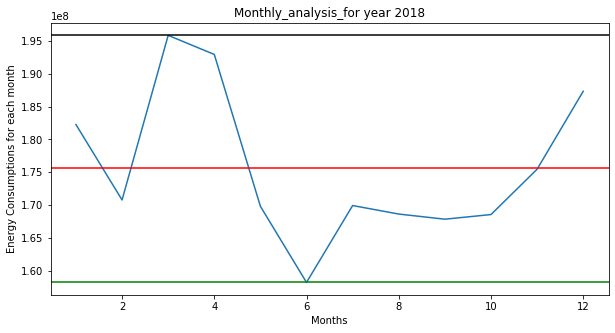

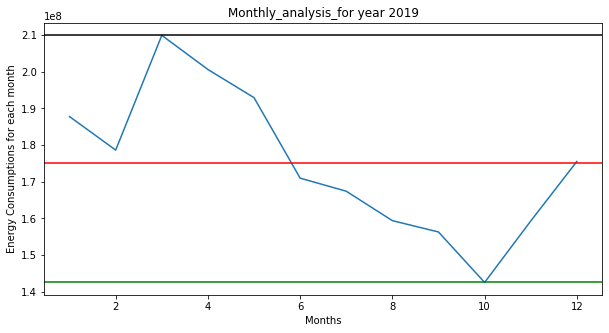

In [21]:
#Monthly analysis of our Data

for i in df['Year'].unique():
    x=df[df['Year']==i]
    x=x.groupby(['Month']).agg({'BESCOM':'sum'})
    plt.figure(figsize=(10,5))
    plt.plot(x.BESCOM)
    plt.axhline(y=np.mean(x.BESCOM),color='red')
    plt.axhline(y=np.min(x.BESCOM),color='green')
    plt.axhline(y=np.max(x.BESCOM),color='black')
    plt.title('Monthly_analysis_for year {}'.format(i))
    plt.xlabel('Months')
    plt.ylabel('Energy Consumptions for each month')
    plt.grid(False)

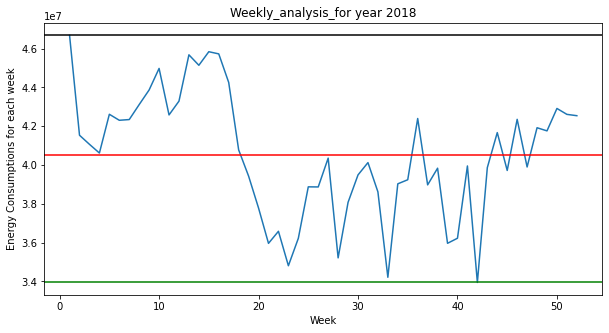

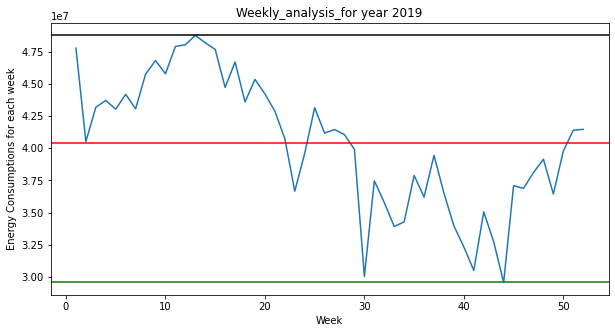

In [22]:
##Weekly analysis of our Data 

for i in df['Year'].unique():
    x=df[df['Year']==i]
    x=x.groupby(['Week']).agg({'BESCOM':'sum'})
    plt.figure(figsize=(10,5))
    plt.plot(x.BESCOM)
    plt.axhline(y=np.mean(x.BESCOM),color='red')
    plt.axhline(y=np.min(x.BESCOM),color='green')
    plt.axhline(y=np.max(x.BESCOM),color='black')
    plt.title('Weekly_analysis_for year {}'.format(i))
    plt.xlabel('Week')
    plt.ylabel('Energy Consumptions for each week')
    plt.grid(False)

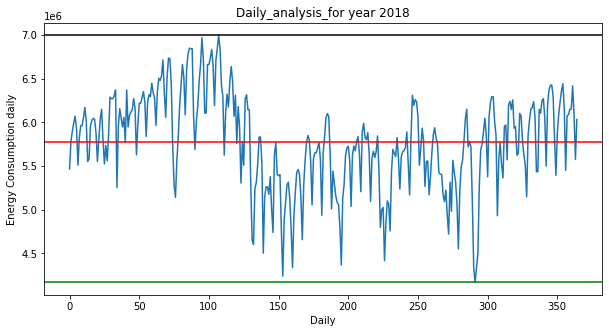

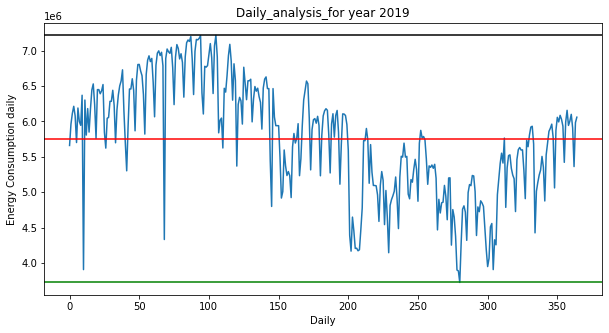

In [23]:
#Daily analysis of our Data

for i in df['Year'].unique():
    x=df[df['Year']==i]
    x=x.groupby(['Month','Daily']).agg({'BESCOM':'sum'}).reset_index()
    plt.figure(figsize=(10,5))
    plt.plot(x.BESCOM)
    plt.axhline(y=np.mean(x.BESCOM),color='red')
    plt.axhline(y=np.min(x.BESCOM),color='green')
    plt.axhline(y=np.max(x.BESCOM),color='black')
    plt.title('Daily_analysis_for year {}'.format(i))
    plt.xlabel('Daily')
    plt.ylabel('Energy Consumption daily')
    plt.grid(False)

In [24]:
check_df=df.copy()

In [25]:
check_list=[]
for i in check_df['Datetime']:
    i=str(i)
    check_list.append(pd.to_datetime(i.split()[0],format=('%Y-%m-%d')))

In [26]:
check_df['Datetime']=pd.Series(check_list)

In [27]:
BESCOM_Daily=check_df.groupby(['Datetime']).agg({'BESCOM':'sum'}).reset_index()

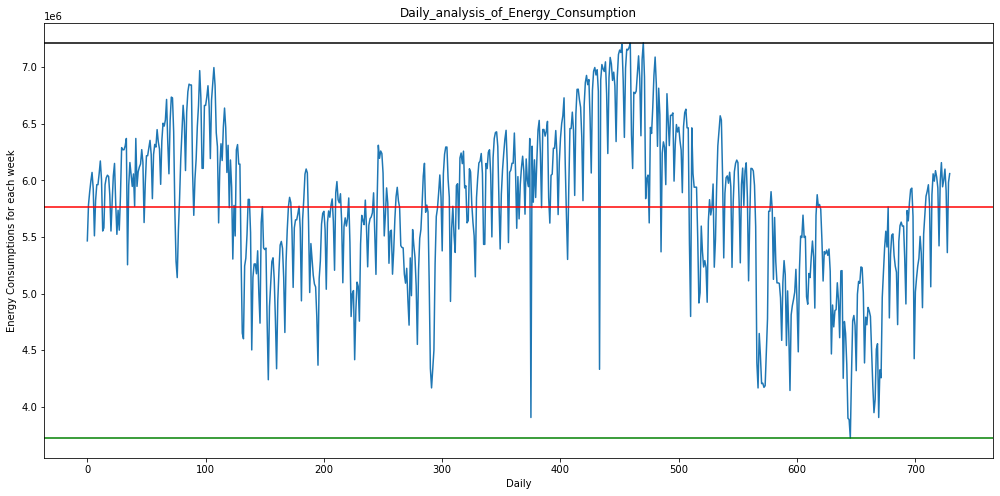

In [28]:
plt.figure(figsize=(17,8))
plt.plot(BESCOM_Daily.BESCOM)
plt.axhline(y=np.mean(BESCOM_Daily.BESCOM),color='red')
plt.axhline(y=np.min(BESCOM_Daily.BESCOM),color='green')
plt.axhline(y=np.max(BESCOM_Daily.BESCOM),color='black')
plt.title('Daily_analysis_of_Energy_Consumption')
plt.xlabel('Daily')
plt.ylabel('Energy Consumptions for each week')
plt.grid(False)

In [29]:
trace = go.Scatter(
   x = df.Datetime,
   y = df['BESCOM'])

go.Figure(data=[trace])

In [31]:
#MOVING AVG aTO SMOOTHEN OUR DATA
def plot_moving_average(series,window,plot_intervals=False,scale=1.96):
    rolling_mean=series.rolling(window=window).mean()
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean,'g',label='Rolling mean Trend')
    #PLOT confidence interval for smoothed value :: 
    if plot_intervals:
        mae=mean_absolute_error(series[window:],rolling_mean[window:])
        deviation=np.std(series[window:]-rolling_mean[window:])
        lower_bound=rolling_mean-(mae+scale*deviation)
        upper_bound=rolling_mean+(mae+scale*deviation)
        plt.plot(upper_bound,'r--',label='Upper bound / lower bound')
        plt.plot(lower_bound,'r--')
    plt.plot(series[window:],label='Actual Value')
    plt.legend(loc='best')
    plt.grid(True)

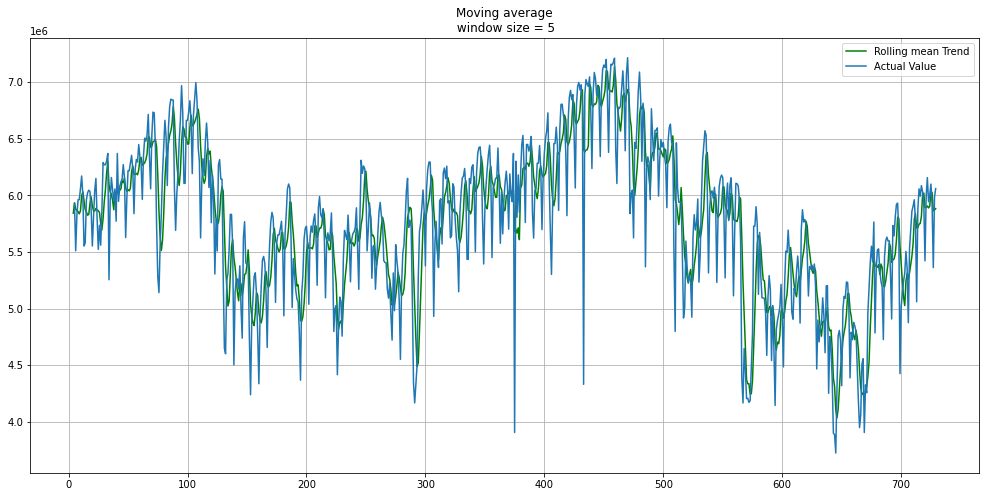

In [32]:
plot_moving_average(BESCOM_Daily.BESCOM,5)

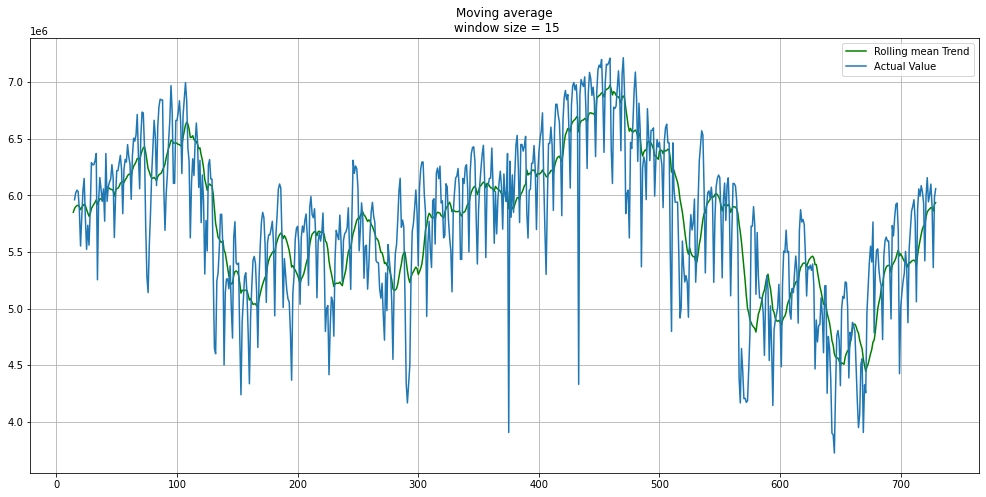

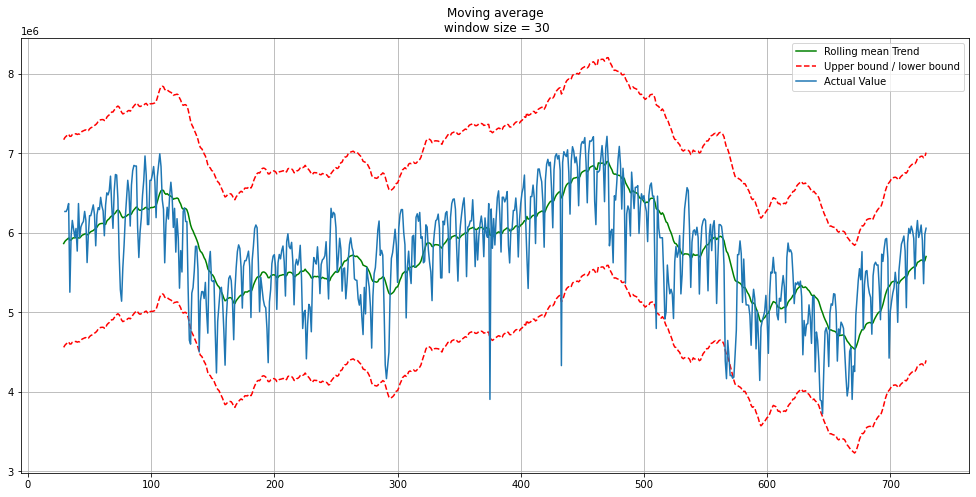

In [33]:
plot_moving_average(BESCOM_Daily.BESCOM,15)
plot_moving_average(BESCOM_Daily.BESCOM,30,plot_intervals=True)

In [36]:
##Let's try to build time series model. But we can check whether this time series is 
##stationary or not 

#We must turn our series into a stationary process in order to model it.
#Therefore, let’s apply the Dickey-Fuller test to see if it is a stationary process:

In [37]:
def tsplot(y,lags=None,figsize=(17,8),style='bmh'):
    if not isinstance(y,pd.Series):
        y=pd.Series(y)
    with plt.style.context(style='bmh'):
        fig=plt.figure(figsize=figsize)
        layout=(2,2)
        ts_ax=plt.subplot2grid(layout,(0,0),colspan=2)
        acf_ax=plt.subplot2grid(layout,(1,0))
        pacf_ax=plt.subplot2grid(layout,(1,1))
        y.plot(ax=ts_ax)
        p_value=sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time series analysis Plots \nDickey Fuller:p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y,lags=lags,ax=acf_ax)
        smt.graphics.plot_pacf(y,lags=lags,ax=pacf_ax)
        plt.tight_layout()

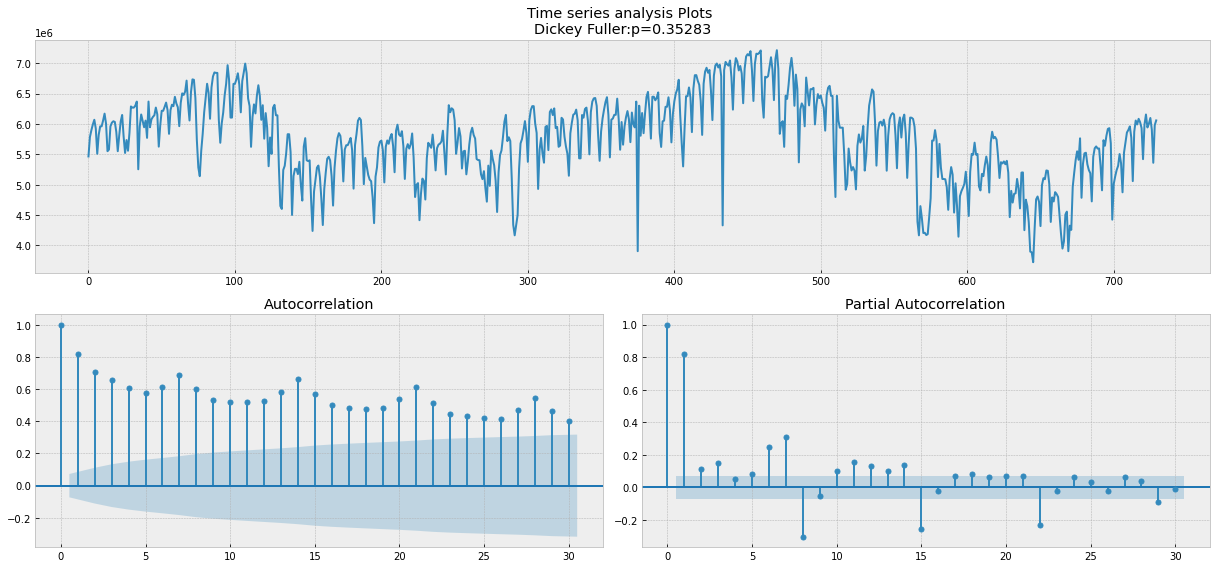

In [38]:
tsplot(BESCOM_Daily.BESCOM,lags=30)

In [39]:
##As per Dickey Fuller test we can see that process is stattionary since the p_value == 0 over here.
##Without going into the technicalities of the Dickey-Fuller test, it test the null hypothesis that a unit root is present.

##If it is, then p > 0, and the process is not stationary.

##Otherwise, p = 0, the null hypothesis is rejected, and the process is considered to be stationary.

In [40]:
BESCOM_DIFF=BESCOM_Daily.BESCOM-BESCOM_Daily.BESCOM.shift(1)

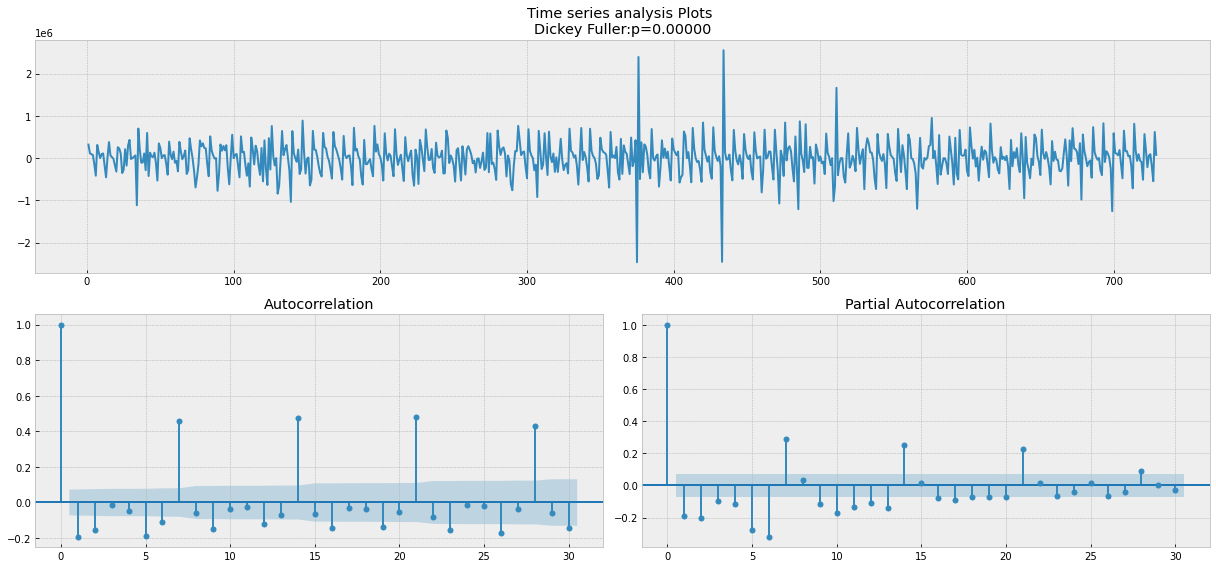

In [41]:
tsplot(BESCOM_DIFF[1:],lags=30)